In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Магическая команда Jupyter Notebook, используется для того, что бы график строился не в отдельном окне, а в ноутбуке с кодом

In [5]:
%matplotlib inline

Построение диаграмм

In [6]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1, 4, 9, 16, 25]

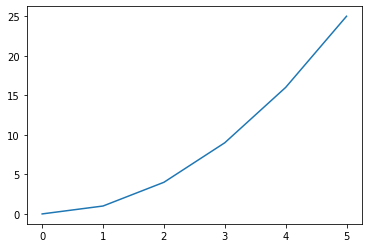

In [7]:
# Линейная диаграма (график)
plt.plot(y)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

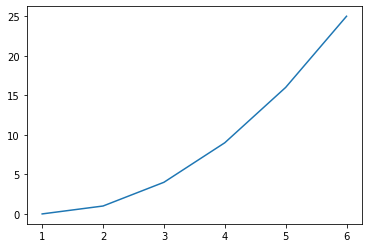

In [8]:
plt.plot(x, y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

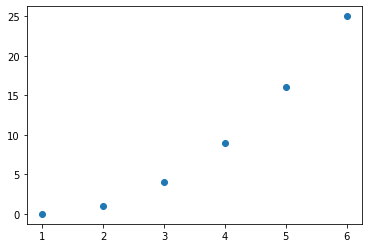

In [9]:
# Точечная диаграмма (диаграмма разброса)
plt.scatter(x, y)
plt.show

Логарифмический масштаб

In [10]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]

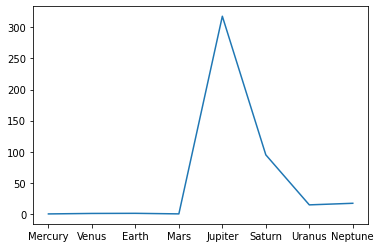

In [11]:
# Без применения логарифмического масштаба (линейный масштаб)
plt.plot(planets, masses)
plt.show()

In [12]:
masses[planets.index('Earth')] / masses[planets.index('Mercury')]

18.091688678221225

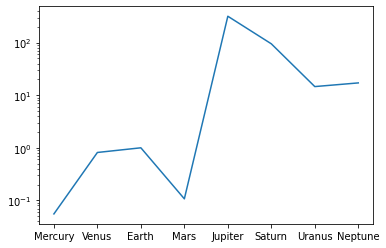

In [13]:
# Логарифмический масштаб на вертикальной оси
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [14]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

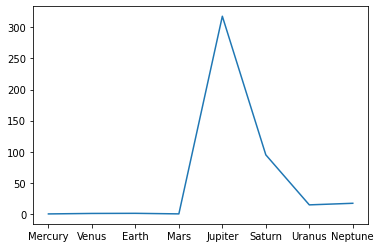

In [15]:
planet_info.plot()
plt.show()

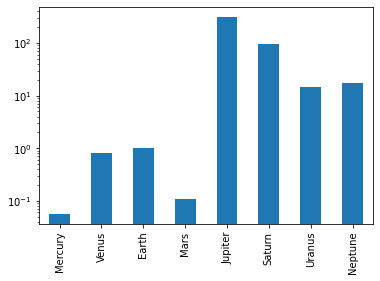

In [16]:
# Столбчатая диаграмма
planet_info.plot(kind='bar', logy=True)
plt.show()

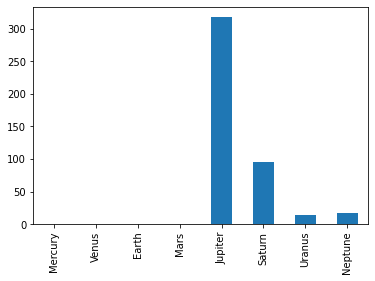

In [17]:
planet_info.plot(kind='bar')
plt.show()

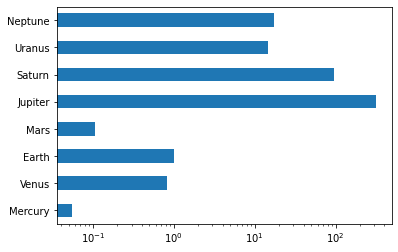

In [18]:
planet_info.plot(kind='barh', logx=True)
plt.show()

Построение гистограмм

In [19]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

(array([3., 3., 4.]), array([0., 3., 6., 9.]), <BarContainer object of 3 artists>)


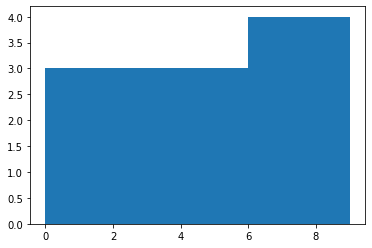

In [20]:
hist_info = plt.hist(a, bins=3)
print(hist_info)
plt.show()

In [21]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<function matplotlib.pyplot.show(close=None, block=None)>

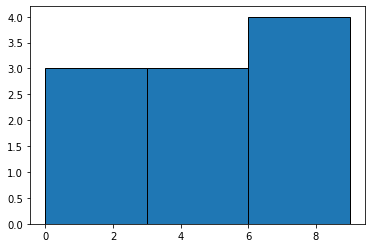

In [22]:
plt.hist(a, bins=3, edgecolor='black')
plt.show

(array([3., 3., 4.]),
 array([0., 3., 6., 9.]),
 <BarContainer object of 3 artists>)

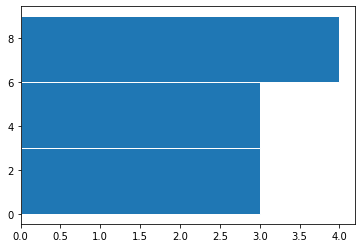

In [23]:
# ec - синоним edgecolor
plt.hist(a, bins=3, orientation='horizontal', ec='white')

Визуализация данных на примере индекса Биг-Мака

In [24]:
# Данные с сайта журнала Economist
url = 'http://infographics.economist.com/2018/databank/BMFile2000toJan2018.xls'

In [27]:
bmi = pd.read_excel(url)


In [28]:
bmi.shape

(57, 11)

In [30]:
bmi.columns

Index(['Country', 'local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [31]:
bmi.iloc[:, :4].head(10)

,Country,local_price,dollar_ex,dollar_price
0,Argentina,75.00,18.937500,3.960396
1,Australia,5.90,1.253683,4.706135
2,Brazil,16.50,3.227900,5.111683
3,Britain,3.19,0.722857,4.413046
4,Canada,6.55,1.245900,5.257244
5,Chile,2600.00,605.935000,4.290889
6,China,20.40,6.432000,3.171642
7,Colombia,10900.00,2844.120000,3.832468
8,Costa Rica,2290.00,568.530000,4.027932
9,Czech Republic,79.00,20.747000,3.807779


In [32]:
bm_price_series = bmi.set_index('Country')['dollar_price']
bm_price_series.head()

Country
Argentina    3.960396
Australia    4.706135
Brazil       5.111683
Britain      4.413046
Canada       5.257244
Name: dollar_price, dtype: float64

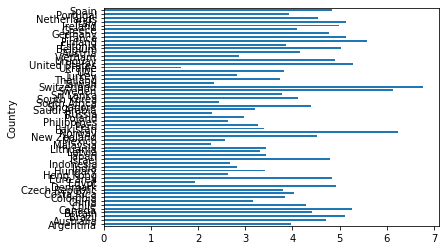

In [33]:
bm_price_series.plot(kind='barh')
plt.show()

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 12

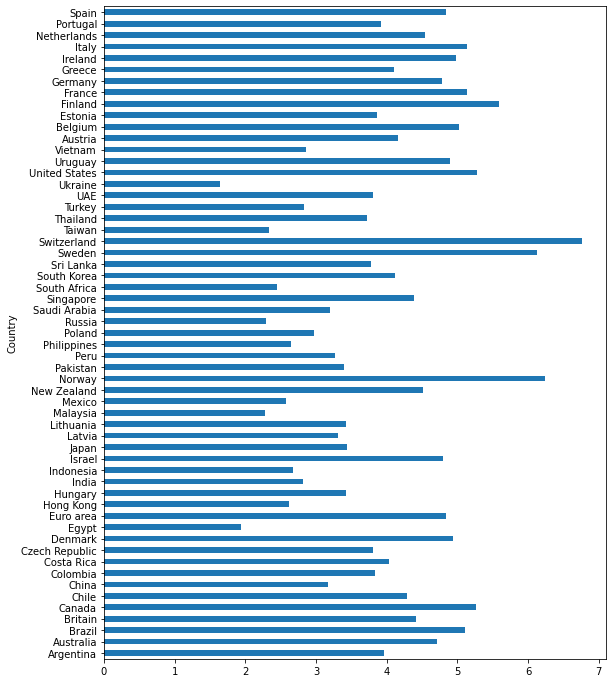

In [43]:
bm_price_series.plot(kind='barh')
plt.show()

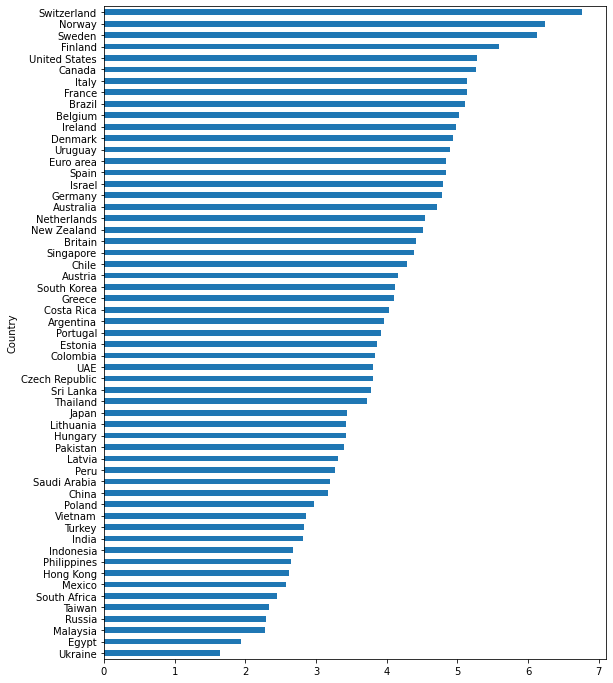

In [44]:
bm_price_series.sort_values().plot(kind='barh')
plt.show()

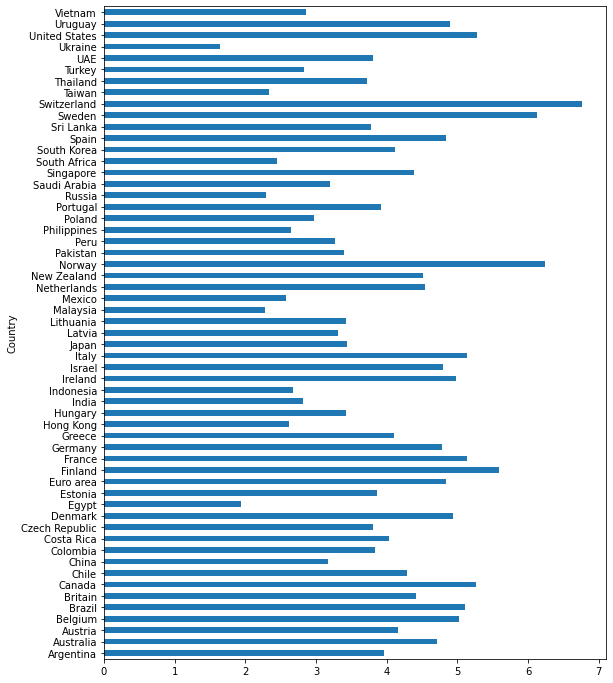

In [45]:
bm_price_series.sort_index().plot(kind='barh')
plt.show()

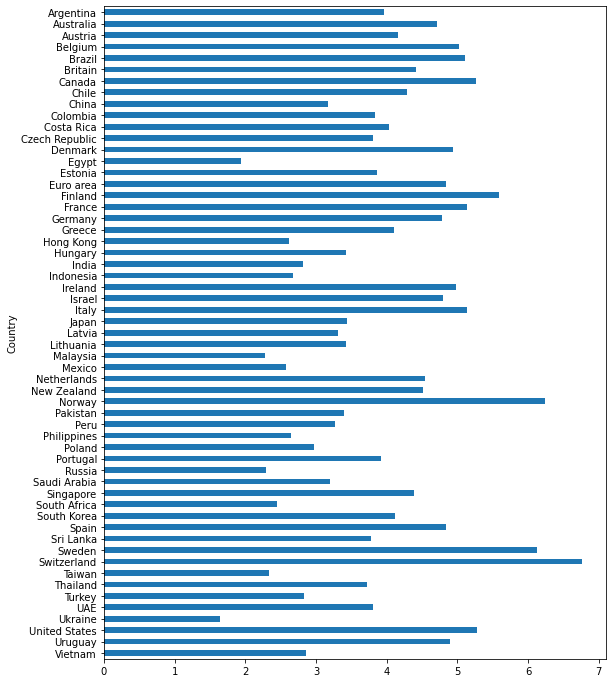

In [46]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')
plt.show()

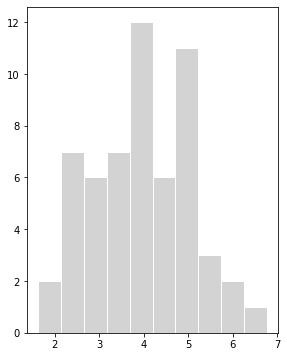

In [47]:
rcParams['figure.figsize'] = 4.5, 6
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.show()

Сохранение графиков в файл

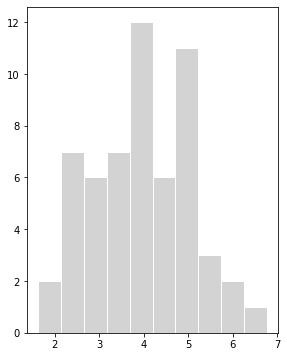

In [51]:
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.savefig('BM_price', format='png')
plt.show()

In [50]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf